# 序列資料預測 - 多層感知模型 MLP (DIY資料集)

## 1.DIY Dataset 序列資料
建立序列 Dataset，以等差數列，例如：x=[15, 25, 35] y=45

### 1.1 DIY 製作『數字序列』資料之準備工作

In [1]:
# 定義DIY函式
from numpy import array

# 傳入序列內容 raw, 指定每組序列長度 seq
def DIY(raw, seq):
	x, y = list(), list()
	for i in range(len(raw)):
		end = i + seq  # 設定序列結束點
		if end > len(raw)-1:  # 檢查是否結束序列
			break
		# 產生序列(x數據/題目 ,y標籤/答案)
		seq_x, seq_y = raw[i:end], raw[end]
		x.append(seq_x)  # 元素加入list
		y.append(seq_y)  # 元素加入list
	return array(x), array(y)  # list轉矩陣 並傳回

# 自訂顯示函數
def show(x, y):
  for i in range(len(x)):
    print(x[i], y[i])  # 同時列出 x, y

### 1.2 原始數據

In [7]:
# 設定序列內容 raw
raw_data = [15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145]
# raw_data = [20, 40, 60, 80, 100, 120, 140, 160, 180]

# 序列長度 seq
seq = 3

### 1.3 建立訓練集 X_train, Y_train

In [8]:
# 使用函式 DIY() 及 show()
x_train, y_train = DIY(raw_data, seq)
show(x_train, y_train)


[15 25 35] 45
[25 35 45] 55
[35 45 55] 65
[45 55 65] 75
[55 65 75] 85
[65 75 85] 95
[75 85 95] 105
[ 85  95 105] 115
[ 95 105 115] 125
[105 115 125] 135
[115 125 135] 145


### 1.4 建立測試集 x_test, y_test

In [5]:
# 使用未知數字建立測試集
# test_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
test_data = [90, 80, 70, 60, 50, 40, 30, 20, 10]

# 序列長度 seq
seq = 3
x_test, y_test = DIY(test_data, seq)
show(x_test, y_test)


[90 80 70] 60
[80 70 60] 50
[70 60 50] 40
[60 50 40] 30
[50 40 30] 20
[40 30 20] 10


### 1.5 查詢 DIY Dataset 資料筆數

In [9]:
# 查看資料結構
print(x_train.shape , x_test.shape)
print(y_train.shape , y_test.shape)

(11, 3) (6, 3)
(11,) (6,)


## 2.建模與訓練參數調整

### 2.1 匯入TensorFlow

In [10]:
# 匯入TensorFlow
import tensorflow

# 匯入建模所需的模組
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model     #模型工具
from tensorflow.keras.models import Sequential  #順序序模型
from tensorflow.keras.layers import Dense    #全連接層
from tensorflow.keras import backend       #後端模組

### 2.2 MLP 建模與編譯

In [11]:
# MLP 模型
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=seq, name='Hidden-1'))  #隱藏層
model.add(Dense(100, activation='relu', name='Hidden-2'))
model.add(Dense(1, name='Out')) #輸出層

# 編譯模型
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-1 (Dense)            (None, 10)                40        
                                                                 
 Hidden-2 (Dense)            (None, 100)               1100      
                                                                 
 Out (Dense)                 (None, 1)                 101       
                                                                 
Total params: 1241 (4.85 KB)
Trainable params: 1241 (4.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


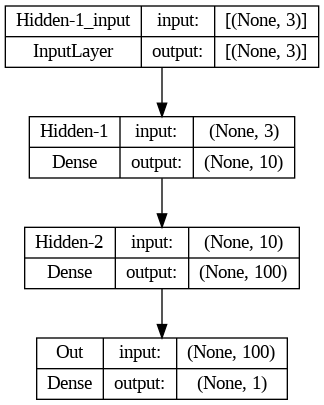

In [12]:
# 圖形顯示模型
from tensorflow.keras.utils import plot_model

# plot_model(model)
plot_model(model, show_shapes=True)
# plot_model(model, show_shapes=True, to_file='model.png')

### 2.3 調整模型 "訓練" 參數
- 傳回 model.fit() 的歷史記錄

In [13]:
# 開始訓練
%%time
history = model.fit(x_train, y_train, epochs=1000, verbose=0)
# 訓練參數 epochs=10 100 1000
# verbose: 0=無顯示, 1=進度條, 2=每輪一行。

CPU times: user 6.64 s, sys: 213 ms, total: 6.86 s
Wall time: 6.35 s


In [14]:
# 查看
print(history.history)
print(history.history.keys())
print(len(history.history['loss']))

{'loss': [9725.59765625, 9614.8779296875, 9504.9443359375, 9395.228515625, 9285.634765625, 9176.1982421875, 9066.7705078125, 8957.52734375, 8848.3134765625, 8739.0478515625, 8629.5341796875, 8519.748046875, 8409.6904296875, 8299.3583984375, 8188.77392578125, 8077.85986328125, 7966.578125, 7854.82373046875, 7742.5205078125, 7629.578125, 7515.978515625, 7401.41748046875, 7285.6064453125, 7168.97705078125, 7051.55517578125, 6933.49560546875, 6814.74267578125, 6695.46728515625, 6575.88330078125, 6455.55908203125, 6334.3955078125, 6212.46435546875, 6089.89794921875, 5966.59375, 5842.73486328125, 5718.50439453125, 5594.0107421875, 5469.59326171875, 5345.06591796875, 5220.28564453125, 5095.4423828125, 4970.859375, 4846.3720703125, 4721.95166015625, 4597.2568359375, 4472.36865234375, 4347.39501953125, 4222.5048828125, 4097.87939453125, 3973.676025390625, 3849.691162109375, 3726.018798828125, 3602.913818359375, 3480.87646484375, 3360.079833984375, 3240.0888671875, 3120.684326171875, 3001.980224

### 2.4 顯示訓練成效loss
- 同時檢視 loss 與 accuracy

In [15]:
# 評估
# Train
loss, accuracy = model.evaluate(x_train, y_train)
print('Train loss: {:.6f}'.format(loss))
print('Train accuracy: {:.6f}'.format(accuracy))

# Test
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss: {:.6f}'.format(loss))
print('Test accuracy: {:.6f}'.format(accuracy))

1/1 [==============================] - 0s 182ms/step - loss: 18.7136 - accuracy: 0.0000e+00
Train loss: 18.713631
Train accuracy: 0.000000
1/1 [==============================] - 0s 26ms/step - loss: 510.2710 - accuracy: 0.0000e+00
Test loss: 510.271027
Test accuracy: 0.000000


### 2.5 查看訓練的過程

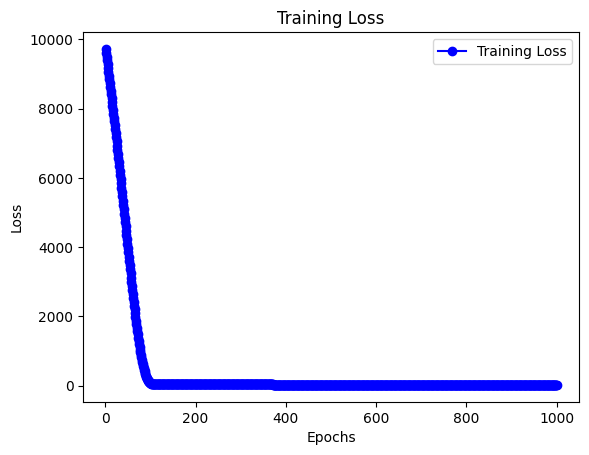

In [16]:
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt

# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


### 2.6 重新建模前先刪除舊模組
- 重覆執行 model.fit() 是繼續之前，再增加訓練
- 繼續訓練：重覆執行訓練 model.fit()，查看每次的結果
- 比較重新建模後再執行的結果

In [ ]:
# 調整的參數與訓練成效，會累積影響現有模型
# 清除與刪除現有模型，調整參數才有意義

# backend.clear_session()
# del model

## 3.模型預測

### 3.1 預測

In [17]:
# 預測
test_input = [[ 75, 85, 95]]  # 原始數列的最後三個（用來預測下一個）

test = model.predict(test_input, verbose=1)
print(test_input)
print('預測序列值: ', test[0][0])


1/1 [==============================] - 0s 118ms/step
[[75, 85, 95]]
預測序列值:  104.686424


### 3.2 更多的預測

In [ ]:
# 預測
test_input2 = [ [40, 50, 60], [75, 85, 95], [80, 90, 100], [130, 140, 150]]
test2 = model.predict(test_input2, verbose=1)
print(test_input2)
print('預測序列值: ')
print(test2)
